# Fun With STL

STL is a very common file format for 3D objects designed for 3D printing. To learn more about the file format and its history, check out https://all3dp.com/what-is-stl-file-format-extension-3d-printing/.

This notebook will explore the capabilities of the [numpy-stl](https://numpy-stl.readthedocs.io/en/latest/) python library for interacting with stl files.


In [2]:
# ask matplotlib to show figures in notebook
%pylab inline
# ask jupyter to pretty print things
%pprint

Populating the interactive namespace from numpy and matplotlib
Pretty printing has been turned OFF


## Quickstart

### Plotting

This example is taken straight from [the numpy-stl quickstart instructions](https://numpy-stl.readthedocs.io/en/latest/usage.html#initial-usage). The only change is that we use one of the Thingi10k models.

/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  


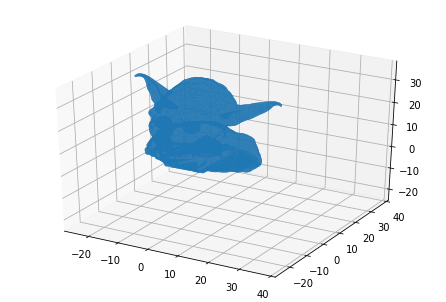

In [3]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('../data/processed/37861_yoda.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

### Modifying

/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/ipykernel_launcher.py:69: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


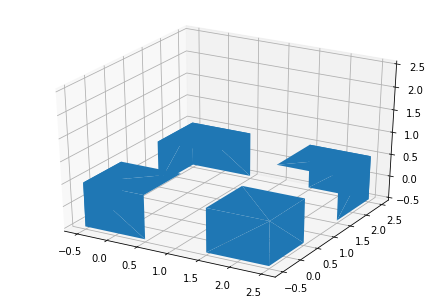

In [4]:
from stl import mesh
import math
import numpy

# Create 3 faces of a cube
data = numpy.zeros(6, dtype=mesh.Mesh.dtype)

# Top of the cube
data['vectors'][0] = numpy.array([[0, 1, 1],
                                  [1, 0, 1],
                                  [0, 0, 1]])
data['vectors'][1] = numpy.array([[1, 0, 1],
                                  [0, 1, 1],
                                  [1, 1, 1]])
# Right face
data['vectors'][2] = numpy.array([[1, 0, 0],
                                  [1, 0, 1],
                                  [1, 1, 0]])
data['vectors'][3] = numpy.array([[1, 1, 1],
                                  [1, 0, 1],
                                  [1, 1, 0]])
# Left face
data['vectors'][4] = numpy.array([[0, 0, 0],
                                  [1, 0, 0],
                                  [1, 0, 1]])
data['vectors'][5] = numpy.array([[0, 0, 0],
                                  [0, 0, 1],
                                  [1, 0, 1]])

# Since the cube faces are from 0 to 1 we can move it to the middle by
# substracting .5
data['vectors'] -= .5

# Generate 4 different meshes so we can rotate them later
meshes = [mesh.Mesh(data.copy()) for _ in range(4)]

# Rotate 90 degrees over the Y axis
meshes[0].rotate([0.0, 0.5, 0.0], math.radians(90))

# Translate 2 points over the X axis
meshes[1].x += 2

# Rotate 90 degrees over the X axis
meshes[2].rotate([0.5, 0.0, 0.0], math.radians(90))
# Translate 2 points over the X and Y points
meshes[2].x += 2
meshes[2].y += 2

# Rotate 90 degrees over the X and Y axis
meshes[3].rotate([0.5, 0.0, 0.0], math.radians(90))
meshes[3].rotate([0.0, 0.5, 0.0], math.radians(90))
# Translate 2 points over the Y axis
meshes[3].y += 2


# Optionally render the rotated cube faces
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube faces
for m in meshes:
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate([m.points for m in meshes]).flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

### Exploring the Mesh Object

Documentation: https://numpy-stl.readthedocs.io/en/latest/stl.html#stl-mesh

In [4]:
model = mesh.Mesh.from_file('../data/processed/37861_yoda.stl')
model

In [5]:
model.__dict__.keys()

dict_keys(['speedups', 'name', 'data'])

In [6]:
# file name
# the extra binary is extra header info
model.name

b'092311 - replicant - g - yoda - lk1.stl\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [7]:
# this is some flag for speeding up execution of numpy-stl
model.speedups

True

In [26]:
model.get_mass_properties()

Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69


(14531.417705905495,
 array([-0.35438355,  0.4520925 , 16.04603275]),
 array([[2079421.26233704,    2730.35198466,   -8756.82082028],
        [   2730.35198466, 2033353.41250214,  362426.45188804],
        [  -8756.82082028,  362426.45188804, 1382852.82846094]]))

In [10]:
# these are the vertices
# each element in the array is a length 3 tuple
# (normal vector, vertices, attrs)
# ([n1, n2, n3], [[v1x, v1y, v1z], [v2x, v2y, v2z], [v3x, v3y, v3z]], [])
# from the code, attrs is always empty
model.data

array([([-0.03431365,  0.0769454 , -0.06179484], [[-3.8814151,  6.39319  , 16.244833 ], [-4.3469315,  6.2466817, 16.320898 ], [-4.3847075,  6.3675375, 16.492361 ]], [0]),
       ([ 0.01851021,  0.04470879,  0.04096463], [[ 3.0408778, 16.11172  ,  5.0861425], [ 3.0669327, 15.875168 ,  5.3325415], [ 3.2446575, 15.833855 ,  5.297324 ]], [0]),
       ([ 0.4561131 , -0.14415653,  0.24120784], [[ 7.851582 , -3.2437444, 29.76174  ], [ 8.051557 , -3.5191286, 29.219015 ], [ 8.215932 , -2.5392964, 29.49378  ]], [0]),
       ...,
       ([-0.00355939,  0.00384505, -0.00076373], [[ 3.3700223,  1.3644854,  5.2962484], [ 3.3746119,  1.3596653,  5.2505913], [ 3.2903962,  1.2817061,  5.2505913]], [0]),
       ([-0.00355433,  0.0038396 , -0.00076269], [[ 3.2859259,  1.2866371,  5.2962484], [ 3.3700223,  1.3644854,  5.2962484], [ 3.2903962,  1.2817061,  5.2505913]], [0]),
       ([-0.00393712,  0.00425312, -0.00103038], [[ 3.3638215,  1.3709977,  5.3468227], [ 3.3700223,  1.3644854,  5.2962484], [ 3.285

In [17]:
# interestingly, the array is 1 dimensional
# this number is the num of triangles in the shape
model.data.shape

(89466,)

In [16]:
# each element is of type "void" 
type(model.data[0])

numpy.void

In [30]:
# and it has no shape?
model.data[0].shape

()

In [32]:
# here is what one element looks like
model.data[0]

([-0.03431365,  0.0769454 , -0.06179484], [[-3.8814151,  6.39319  , 16.244833 ], [-4.3469315,  6.2466817, 16.320898 ], [-4.3847075,  6.3675375, 16.492361 ]], [0])

In [42]:
# to convert it into a flat array...
def reshape_mesh_triangle_array(triangle):
    new = np.asarray([triangle[0],
                      triangle[1][0],
                      triangle[1][1],
                      triangle[1][2]])
    return new
    
triangle = reshape_mesh_triangle_array(model.data[0])
print(triangle.shape)
triangle

(4, 3)


array([[-0.03431365,  0.0769454 , -0.06179484],
       [-3.8814151 ,  6.39319   , 16.244833  ],
       [-4.3469315 ,  6.2466817 , 16.320898  ],
       [-4.3847075 ,  6.3675375 , 16.492361  ]], dtype=float32)

In [43]:
# now to convert the entire mesh into a normal np array
def mesh_to_nparray(mesh_data):
    return np.asarray([reshape_mesh_triangle_array(triangle) for triangle in mesh_data])

mesh_to_nparray(model.data).shape

(89466, 4, 3)

In [44]:
# there's also a vectors attr...
model.vectors

array([[[-3.8814151,  6.39319  , 16.244833 ],
        [-4.3469315,  6.2466817, 16.320898 ],
        [-4.3847075,  6.3675375, 16.492361 ]],

       [[ 3.0408778, 16.11172  ,  5.0861425],
        [ 3.0669327, 15.875168 ,  5.3325415],
        [ 3.2446575, 15.833855 ,  5.297324 ]],

       [[ 7.851582 , -3.2437444, 29.76174  ],
        [ 8.051557 , -3.5191286, 29.219015 ],
        [ 8.215932 , -2.5392964, 29.49378  ]],

       ...,

       [[ 3.3700223,  1.3644854,  5.2962484],
        [ 3.3746119,  1.3596653,  5.2505913],
        [ 3.2903962,  1.2817061,  5.2505913]],

       [[ 3.2859259,  1.2866371,  5.2962484],
        [ 3.3700223,  1.3644854,  5.2962484],
        [ 3.2903962,  1.2817061,  5.2505913]],

       [[ 3.3638215,  1.3709977,  5.3468227],
        [ 3.3700223,  1.3644854,  5.2962484],
        [ 3.2859259,  1.2866371,  5.2962484]]], dtype=float32)

## Creating an STL Mesh From Vectors

In [27]:
model = mesh.Mesh.from_file('../data/processed/37861_yoda.stl')
vectors = model.vectors
vectors.shape

(89466, 3, 3)

In [28]:
from stl.base import BaseMesh
data = numpy.zeros(len(vectors), dtype=BaseMesh.dtype)
new_model = mesh.Mesh(data)
new_model.vectors = vectors

/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  


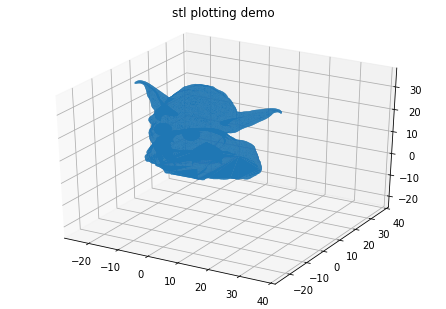

In [37]:
# reusing plotting code from above
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
#your_mesh = mesh.Mesh.from_file('../data/processed/37861_yoda.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(new_model.vectors))

# Auto scale to the mesh size
scale = new_model.vectors.reshape([-1, 9]).flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.title('stl plotting demo', pad=20)
pyplot.show()

In [26]:
new_model.save('_output/creating_an_stl_mesh_from_vectors.stl')

Confirmed that the above saved model works outside of this notebook in the Win10 3D Print STL Viewer!